In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score

In [78]:
df = pd.read_csv('city_united.csv')
df

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,...,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Quality of Life Index
0,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,...,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310,200.03
1,Raleigh,North Carolina,North America,6.1285,5.610,5.4970,5.157,1.7570,4.78425,8.671000,...,6.677333,7.1165,8.58375,6.5145,4.0620,7.9515,6.6130,7.5620,3.3905,197.30
2,Zurich,Switzerland,Europe,1.4730,1.000,6.2035,3.872,7.7335,5.83950,8.888000,...,7.670333,7.2875,8.64300,6.5520,6.4285,7.2675,4.9655,8.7845,5.4010,194.41
3,Wellington,New Zealand,Oceania,5.1345,5.161,2.4715,1.753,0.8525,6.03975,10.000000,...,8.078333,4.7560,9.60925,5.5055,5.9315,5.1745,4.5990,8.1160,6.3970,193.89
4,Charlotte,North Carolina,North America,5.5490,4.987,6.2480,2.878,3.6790,4.13400,8.671000,...,6.432333,3.6245,8.00925,6.5145,4.0620,6.3870,5.6060,6.7895,1.3115,193.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Delhi,India,Asia,9.7520,9.869,9.8285,9.099,5.6420,3.71225,3.618000,...,3.712667,0.5120,2.20300,5.5565,3.4145,3.5880,5.6830,3.1160,1.1785,69.56
183,Jakarta,Indonesia,Asia,8.6710,8.471,5.6495,6.437,2.4885,3.64000,4.028667,...,4.184000,1.0275,2.48575,4.6575,6.2660,4.4990,8.1460,2.0665,7.2020,68.46
184,Lagos,Nigeria,Africa,7.7670,9.098,6.4335,2.510,1.7480,3.56475,3.255667,...,2.862333,0.0000,1.90725,5.0610,6.2155,1.6340,1.3585,1.4060,3.8245,50.72
185,Manila,Philippines,Asia,8.5955,8.752,4.8050,3.547,2.6345,3.71300,4.592333,...,4.297667,0.0000,1.68300,5.0065,4.3030,4.6080,7.5840,5.5030,4.8255,41.88


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UA_Name                187 non-null    object 
 1   UA_Country             187 non-null    object 
 2   UA_Continent           187 non-null    object 
 3   Housing                187 non-null    float64
 4   Cost of Living         187 non-null    float64
 5   Startups               187 non-null    float64
 6   Venture Capital        187 non-null    float64
 7   Travel Connectivity    187 non-null    float64
 8   Commute                187 non-null    float64
 9   Business Freedom       187 non-null    float64
 10  Safety                 187 non-null    float64
 11  Healthcare             187 non-null    float64
 12  Education              187 non-null    float64
 13  Environmental Quality  187 non-null    float64
 14  Economy                187 non-null    float64
 15  Taxati

In [80]:
from sklearn.preprocessing import LabelEncoder

encoder =  LabelEncoder()
df['UA_Country'] = encoder.fit_transform(df['UA_Country']) 
df

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,...,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Quality of Life Index
0,Adelaide,5,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,...,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310,200.03
1,Raleigh,71,North America,6.1285,5.610,5.4970,5.157,1.7570,4.78425,8.671000,...,6.677333,7.1165,8.58375,6.5145,4.0620,7.9515,6.6130,7.5620,3.3905,197.30
2,Zurich,95,Europe,1.4730,1.000,6.2035,3.872,7.7335,5.83950,8.888000,...,7.670333,7.2875,8.64300,6.5520,6.4285,7.2675,4.9655,8.7845,5.4010,194.41
3,Wellington,69,Oceania,5.1345,5.161,2.4715,1.753,0.8525,6.03975,10.000000,...,8.078333,4.7560,9.60925,5.5055,5.9315,5.1745,4.5990,8.1160,6.3970,193.89
4,Charlotte,71,North America,5.5490,4.987,6.2480,2.878,3.6790,4.13400,8.671000,...,6.432333,3.6245,8.00925,6.5145,4.0620,6.3870,5.6060,6.7895,1.3115,193.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Delhi,40,Asia,9.7520,9.869,9.8285,9.099,5.6420,3.71225,3.618000,...,3.712667,0.5120,2.20300,5.5565,3.4145,3.5880,5.6830,3.1160,1.1785,69.56
183,Jakarta,42,Asia,8.6710,8.471,5.6495,6.437,2.4885,3.64000,4.028667,...,4.184000,1.0275,2.48575,4.6575,6.2660,4.4990,8.1460,2.0665,7.2020,68.46
184,Lagos,70,Africa,7.7670,9.098,6.4335,2.510,1.7480,3.56475,3.255667,...,2.862333,0.0000,1.90725,5.0610,6.2155,1.6340,1.3585,1.4060,3.8245,50.72
185,Manila,79,Asia,8.5955,8.752,4.8050,3.547,2.6345,3.71300,4.592333,...,4.297667,0.0000,1.68300,5.0065,4.3030,4.6080,7.5840,5.5030,4.8255,41.88


In [81]:
encoder =  LabelEncoder()
df['UA_Continent'] = encoder.fit_transform(df['UA_Continent']) 
df

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,...,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Quality of Life Index
0,Adelaide,5,4,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,...,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310,200.03
1,Raleigh,71,3,6.1285,5.610,5.4970,5.157,1.7570,4.78425,8.671000,...,6.677333,7.1165,8.58375,6.5145,4.0620,7.9515,6.6130,7.5620,3.3905,197.30
2,Zurich,95,2,1.4730,1.000,6.2035,3.872,7.7335,5.83950,8.888000,...,7.670333,7.2875,8.64300,6.5520,6.4285,7.2675,4.9655,8.7845,5.4010,194.41
3,Wellington,69,4,5.1345,5.161,2.4715,1.753,0.8525,6.03975,10.000000,...,8.078333,4.7560,9.60925,5.5055,5.9315,5.1745,4.5990,8.1160,6.3970,193.89
4,Charlotte,71,3,5.5490,4.987,6.2480,2.878,3.6790,4.13400,8.671000,...,6.432333,3.6245,8.00925,6.5145,4.0620,6.3870,5.6060,6.7895,1.3115,193.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Delhi,40,1,9.7520,9.869,9.8285,9.099,5.6420,3.71225,3.618000,...,3.712667,0.5120,2.20300,5.5565,3.4145,3.5880,5.6830,3.1160,1.1785,69.56
183,Jakarta,42,1,8.6710,8.471,5.6495,6.437,2.4885,3.64000,4.028667,...,4.184000,1.0275,2.48575,4.6575,6.2660,4.4990,8.1460,2.0665,7.2020,68.46
184,Lagos,70,0,7.7670,9.098,6.4335,2.510,1.7480,3.56475,3.255667,...,2.862333,0.0000,1.90725,5.0610,6.2155,1.6340,1.3585,1.4060,3.8245,50.72
185,Manila,79,1,8.5955,8.752,4.8050,3.547,2.6345,3.71300,4.592333,...,4.297667,0.0000,1.68300,5.0065,4.3030,4.6080,7.5840,5.5030,4.8255,41.88


In [82]:
df.drop('UA_Name', axis=1, inplace=True)

In [83]:
df

,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Quality of Life Index
0,5,4,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310,200.03
1,71,3,6.1285,5.610,5.4970,5.157,1.7570,4.78425,8.671000,6.5225,6.677333,7.1165,8.58375,6.5145,4.0620,7.9515,6.6130,7.5620,3.3905,197.30
2,95,2,1.4730,1.000,6.2035,3.872,7.7335,5.83950,8.888000,9.0665,7.670333,7.2875,8.64300,6.5520,6.4285,7.2675,4.9655,8.7845,5.4010,194.41
3,69,4,5.1345,5.161,2.4715,1.753,0.8525,6.03975,10.000000,8.2230,8.078333,4.7560,9.60925,5.5055,5.9315,5.1745,4.5990,8.1160,6.3970,193.89
4,71,3,5.5490,4.987,6.2480,2.878,3.6790,4.13400,8.671000,5.3475,6.432333,3.6245,8.00925,6.5145,4.0620,6.3870,5.6060,6.7895,1.3115,193.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,40,1,9.7520,9.869,9.8285,9.099,5.6420,3.71225,3.618000,6.4185,3.712667,0.5120,2.20300,5.5565,3.4145,3.5880,5.6830,3.1160,1.1785,69.56
183,42,1,8.6710,8.471,5.6495,6.437,2.4885,3.64000,4.028667,7.0005,4.184000,1.0275,2.48575,4.6575,6.2660,4.4990,8.1460,2.0665,7.2020,68.46
184,70,0,7.7670,9.098,6.4335,2.510,1.7480,3.56475,3.255667,5.9995,2.862333,0.0000,1.90725,5.0610,6.2155,1.6340,1.3585,1.4060,3.8245,50.72
185,79,1,8.5955,8.752,4.8050,3.547,2.6345,3.71300,4.592333,6.4345,4.297667,0.0000,1.68300,5.0065,4.3030,4.6080,7.5840,5.5030,4.8255,41.88


In [84]:
x = df.drop(['Quality of Life Index'], axis=1)
y = df[['Quality of Life Index']]
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.33, random_state=42)

In [85]:
model = LinearRegression().fit(train_x, train_y)

In [86]:
model.score(train_x, train_y)

0.8519099577071958

In [87]:
model.score(test_x, test_y)

0.7174188146827848

In [88]:
mean_squared_error(model.predict(train_x), train_y)

182.86994875060046

In [89]:
mean_squared_error(model.predict(test_x), test_y)

355.2561028672304

<Axes: >

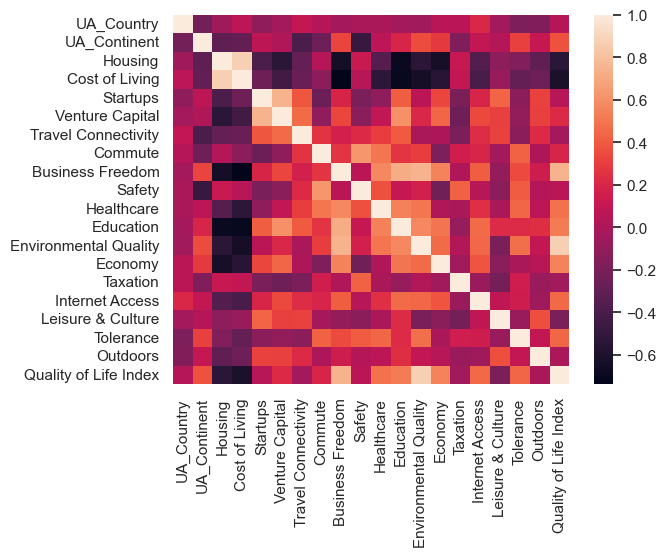

In [90]:
sns.heatmap(df.corr(method='spearman'))

In [96]:
import shap

In [99]:
explainer = shap.Explainer(model, train_x)
shap_values = explainer(test_x)

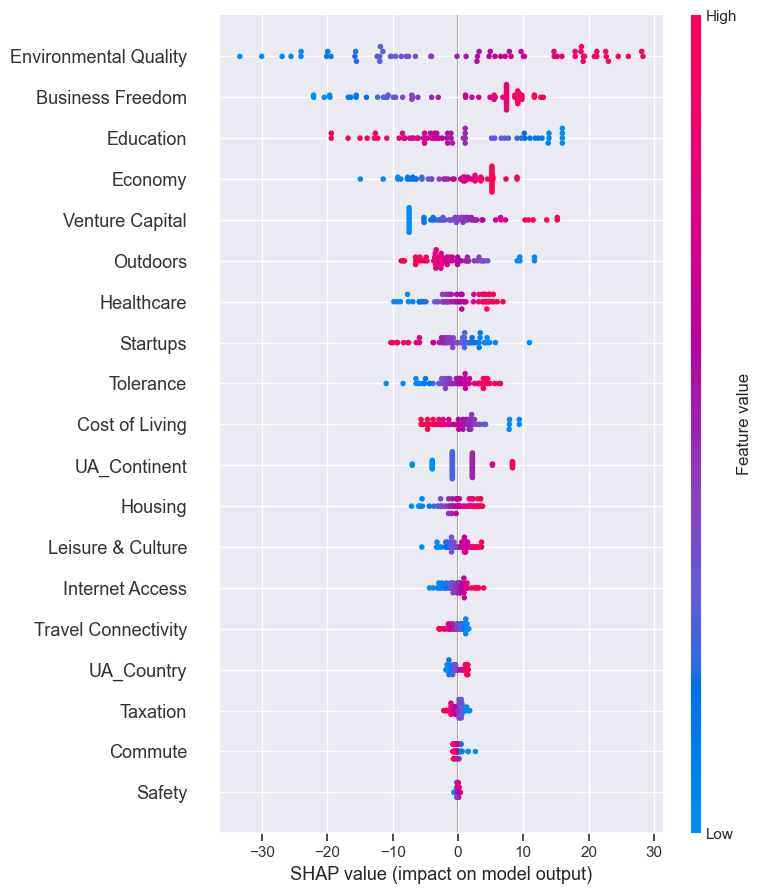

In [100]:
shap.summary_plot(shap_values, test_x)

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)
model = LinearRegression().fit(train_x_scaled, train_y)
R = model.score(train_x_scaled, train_y)
MSE = mean_squared_error(model.predict(train_x_scaled), train_y)
print(R)
print(MSE)

0.8519099577071958
182.86994875060049
